### lab5
Разработать программу вычисления и визуализации морфологического спектра для бинарных и полутоновых изображений и различных структурирующих элементов.

In [171]:
import skimage
from skimage import morphology 
from skimage.morphology import star,diamond,disk, ball
from skimage import io

from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from skimage.util import img_as_ubyte


def plot(image):
    plt.imshow(image, cmap=cm.binary)
    plt.show()
    
def plot_struct_elements(elements):
    n = len(elements)
    fig, (ax1 )= plt.subplots(nrows=1, ncols= n, figsize=(5, 5))
    
    for index in range(n):
            ax1[index].imshow(elements[index], cmap=cm.binary)

    fig.tight_layout()
    plt.show()
    
    
def plot_results(img,x, s, struct_element):
    fig, (ax0,ax1, ax2 )= plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    ax0.imshow(img, cmap=cm.binary)
    ax0.set_xlabel("изображение")

    ax1.bar(x,s)
    ax1.set_xlabel("морфологический спектр")
    
    ax2.imshow(struct_element, cmap=cm.binary)
    ax2.set_xlabel("структурирующий элемент")

## Бинарное изображение

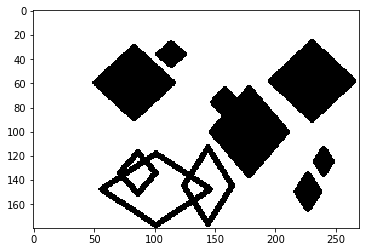

In [119]:
image =img_as_ubyte(io.imread('images/i4.png', as_binary = True))[:,:,0]
plot(image)

## Структурирующий элемент


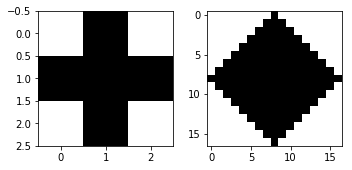

In [108]:
plot_struct_elements([diamond(1), diamond(8) ])

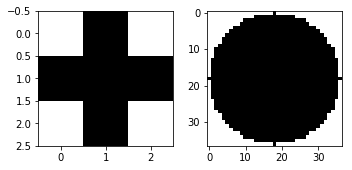

In [117]:
plot_struct_elements([disk(1), disk(18) ])

## Морфологический спектр

In [57]:
def spectrum_iter(X, n, B):
    flag = None   # when 0 stop iteration
    if n >= 0:
        res1 = morphology.opening(X,B(n))
        res2 = morphology.opening(X,B(n + 1))
        flag = np.count_nonzero(morphology.erosion(X,B(n))) == 0
    else:
        res1 = morphology.closing(X,B(abs(n)))
        res2 = morphology.closing(X,B(abs(n) - 1))
          
    res =res1 ^ res2


    return np.count_nonzero(res), flag

In [130]:
def build_spectrum(image, struct_element):
    
    is_stop = False
    n = 0  
    spectrum_pos  = []
    spectrum_pos_x  = []
    while  not is_stop:
        spectrum_num, is_stop = spectrum_iter(image,n,struct_element)
        spectrum_pos.append(spectrum_num)
        spectrum_pos_x.append(n)
        print(n)
        n += 1
       
    spectrum_neg = []
    spectrum_neg_x  = []
    for i in range(n*(-1),-1):
        spectrum_num, _ = spectrum_iter(image,i,struct_element)
        spectrum_neg.append(spectrum_num)
        spectrum_neg_x.append(i)
        print(i)
        
    return spectrum_neg + spectrum_pos , spectrum_neg_x + spectrum_pos_x 
        
        

## Результаты 

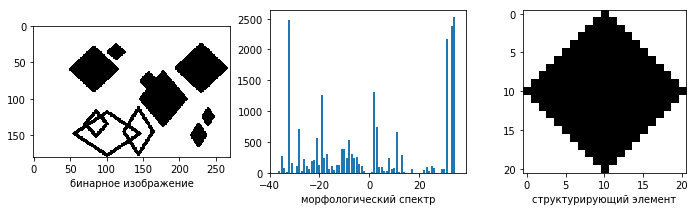

In [115]:
l,ticks = build_spectrum(image,diamond)
plot_results(image,ticks,l,diamond(10))

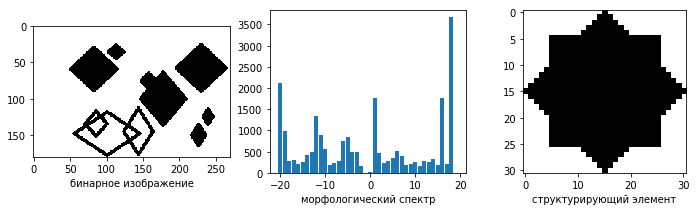

In [114]:
l,ticks = build_spectrum(image,star)
plot_results(image,ticks,l,star(10))

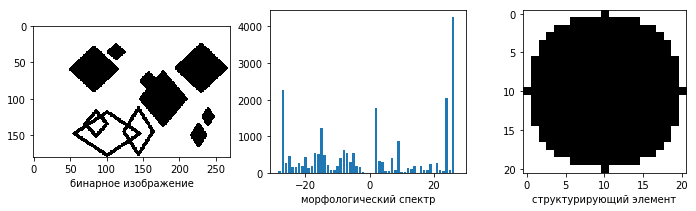

In [116]:
l,ticks = build_spectrum(image,disk)
plot_results(image,ticks,l,disk(10))

## Полутоновое изображение

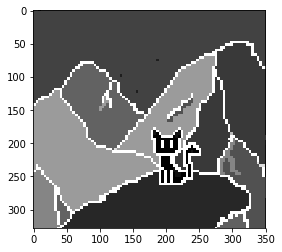

In [140]:
from PIL import Image
im = np.array(Image.open('images/img2.png'))
image_gray = im[:,:,2]
plot(image_gray)

## Морфологический спектр

In [174]:
def spectrum_gray(image, n, k, struct_elem):
    x = []
    P = np.zeros(n + k + 1)
    for i in range(0, k):
        res = morphology.closing(image, struct_elem(k - i)) - morphology.closing(image, struct_elem(k - i - 1)) 
        x.append(i - k )
        P[i] = np.sum(res)/ 255
    for i in range(k, n + k + 1):
        res = morphology.opening(image, struct_elem(i - k)) - morphology.opening(image, struct_elem(i - k + 1))
        P[i] = np.sum(res) / 255
        x.append(i-k)
    return P,x

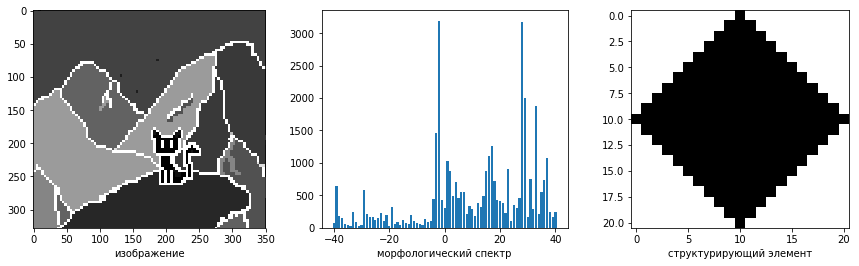

In [175]:
spectrum, ticks = spectrum_gray(image_gray,40,40,diamond)
plot_results(image_gray,ticks,spectrum,diamond(10))

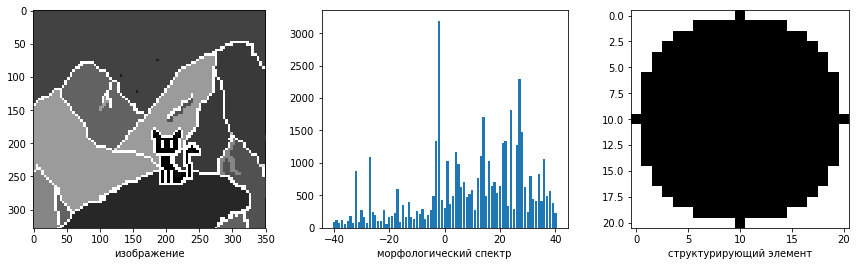

In [176]:
spectrum, ticks = spectrum_gray(image_gray,40,40,disk)
plot_results(image_gray,ticks,spectrum,disk(10))